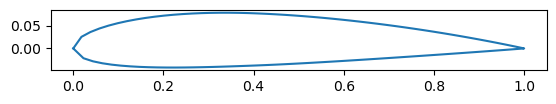

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


class Naca4:
    def __init__(self, series: str, num_pts: int):
        """
        Instantiate the NACA 4-digit series class.

        Parameters
        ----------
        series (string) : 4-digit NACA series
        num_pts (int) : number of points to discretize by
        """

        self.series = series
        self.maxCamber = int(self.series[0]) * 0.01
        self.locCamber = int(self.series[1]) * 0.1
        self.maxThick = ( int(self.series[2]) * 10 + int(self.series[3]) ) * 0.01
        self.num_pts = num_pts

        self.calc_airfoil()

        return

    def calc_airfoil(self):
        x_s = np.linspace(0, 1, self.num_pts)

        y_t = self.calc_thick()
        y_c = self.calc_camberline()
        theta = self.calc_camberAngle()

        x_u = x_s - y_t * np.sin(theta)
        x_l = x_s + y_t * np.sin(theta)
        x_l_ordered = x_l[::-1]

        y_u = y_c + y_t * np.cos(theta)
        y_l = y_c - y_t * np.cos(theta)
        y_l_ordered = y_l[::-1]

        xy = np.zeros(((2*self.num_pts), 2))
        x = np.concatenate((x_u, x_l_ordered))
        y = np.concatenate((y_u, y_l_ordered))
        
        for ind, absge in enumerate(x):
            xy[ind] = [x[ind], y[ind]]

        self.x = x
        self.y = y

        return xy

    def calc_thick(self):
        a1 = 0.2969
        a2 = -0.1260
        a3 = -0.3516
        a4 = 0.2843
        a5 = -0.1036

        t = self.maxThick

        x_space = np.linspace(0, 1, self.num_pts)
        y_t = np.zeros_like(x_space)

        for idx, x in enumerate(x_space):
            y_t[idx] = 5*t*( a1*np.sqrt(x) + a2 * x + a3 * x**2 + a4 * x**3 + a5 * x**4 )

        return y_t

    def calc_camberline(self):
        m = self.maxCamber
        p = self.locCamber

        x_space = np.linspace(0, 1, self.num_pts)
        y_c = np.zeros_like(x_space)

        for idx, x in enumerate(x_space):
            if (x <= p):
                y_c[idx] = m / p**2 * (2*p*x - x**2)
            else:
                y_c[idx] = m / (1-p)**2 * ((1-2*p) + 2*p*x - x**2)

        return y_c
    
    def calc_camberAngle(self):
        m = self.maxCamber
        p = self.locCamber

        x_space = np.linspace(0, 1, self.num_pts)
        y_prime = np.zeros_like(x_space)
        theta = np.zeros_like(x_space)

        for idx, x in enumerate(x_space):
            if (x <= p):
                y_prime[idx] = 2*m / p**2 * (p - x)
                theta[idx] = np.arctan(y_prime[idx])
            else:
                y_prime[idx] = 2*m / (1-p)**2 * (p - x)
                theta[idx] = np.arctan(y_prime[idx])

        return theta

N2412 = Naca4('2412', 50)
locCam = N2412.locCamber
maxT = N2412.maxThick
xy = N2412.calc_airfoil()

fig, ax = plt.subplots()
ax.plot(N2412.x, N2412.y)
ax.set_aspect('equal')